In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 데이터 준비

In [3]:
df = pd.read_csv('C:/Users/82109/Desktop/Study/AI Basic Course/data/mpg.csv')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### 2. 데이터 탐색

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [17]:
print(df['horsepower'].unique())

[130. 165. 150. 140. 198. 220. 215. 225. 190. 170. 160.  95.  97.  85.
  88.  46.  87.  90. 113. 200. 210. 193.  nan 100. 105. 175. 153. 180.
 110.  72.  86.  70.  76.  65.  69.  60.  80.  54. 208. 155. 112.  92.
 145. 137. 158. 167.  94. 107. 230.  49.  75.  91. 122.  67.  83.  78.
  52.  61.  93. 148. 129.  96.  71.  98. 115.  53.  81.  79. 120. 152.
 102. 108.  68.  58. 149.  89.  63.  48.  66. 139. 103. 125. 133. 138.
 135. 142.  77.  62. 132.  84.  64.  74. 116.  82.]


In [6]:
df.dropna(subset=["weight"],inplace=True)
df.dropna(subset=['mpg'],inplace=True)
print(df.mpg.count())
print(df.weight.count())

398
398


In [7]:
print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


### 3. 데이터 선택

In [8]:
df_mpg_weight = df[['mpg','weight']]
df_mpg_weight.head()

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449


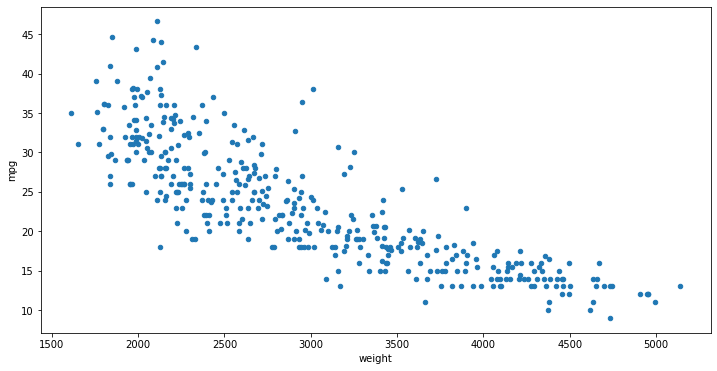

In [9]:
df_mpg_weight.plot(kind = 'scatter',x='weight',y='mpg',figsize = (12,6))
plt.show()

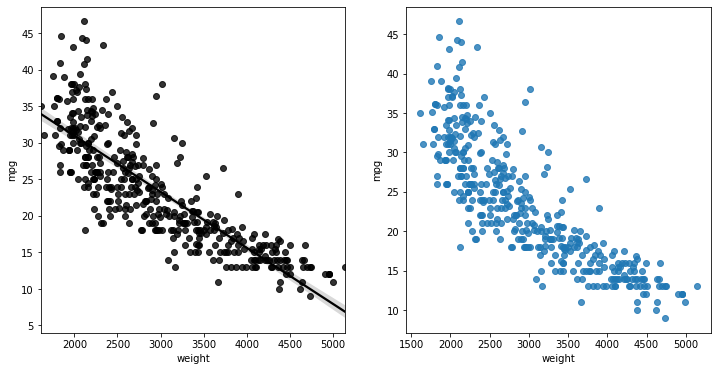

In [10]:
figure = plt.figure(figsize=(12,6))
ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)
sns.regplot(x = 'weight',y='mpg',data = df_mpg_weight,ax=ax1,color='black')
sns.regplot(x = 'weight',y='mpg',data = df_mpg_weight,ax=ax2,fit_reg=False)
plt.show()

### 4. 데이터셋 구분

In [11]:
# 8:2
x = df_mpg_weight[['weight']]
y = df_mpg_weight[['mpg']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)
print(len(x))
print(len(y))

398
398


In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [13]:
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
print(lr.coef_) # w   y = wx + b
print(lr.intercept_) #b

[[-0.00745814]]
[45.62418268]


In [15]:
y_predict = lr.predict(x)

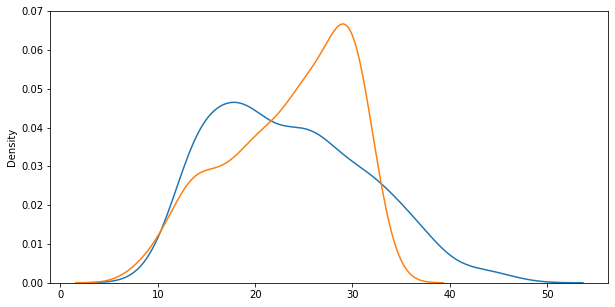

In [16]:
figure = plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False,label='y')
ax2 = sns.distplot(y_predict,hist=False,label='y_predict')
plt.show()

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(298, 1)
(100, 1)
(298, 1)
(100, 1)


In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly = PolynomialFeatures(degree=2) # y = ax^2 + bx +c
poly_x_train = poly.fit_transform(x_train)

In [26]:
print(poly_x_train.shape)

(298, 3)


In [28]:
pr = LinearRegression()
pr.fit(poly_x_train, y_train)

LinearRegression()

In [30]:
poly_x_test = poly.fit_transform(x_test)
# r_square
r_square = pr.score(poly_x_test,y_test)
print(r_square)

0.7160191618931933


In [31]:
y_test_hat = pr.predict(poly_x_test)

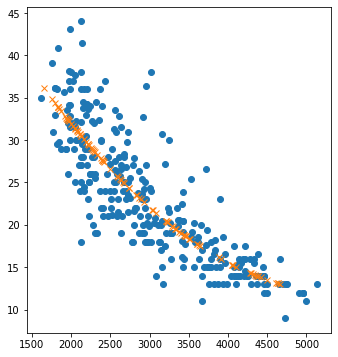

In [40]:
figure = plt.figure(figsize=(12,6))
ax3 = figure.add_subplot(1,2,1)
ax3.plot(x_train,y_train,'o')
ax3.plot(x_test,y_test_hat,'x')
plt.show()

In [37]:
x_poly = poly.fit_transform(x)
y_hat = pr.predict(x_poly)